In [2]:
import polars as pl
import polars.selectors as cs

import altair as alt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import datetime as dt

In [3]:
df_path = r"D:\Datasets\Car_Price_Prediction.csv"

In [4]:
df = pl.read_csv(df_path)

In [5]:
df.schema

Schema([('Make', String),
        ('Model', String),
        ('Year', Int64),
        ('Engine Size', Float64),
        ('Mileage', Int64),
        ('Fuel Type', String),
        ('Transmission', String),
        ('Price', Float64)])

In [6]:
df = df.with_columns(
    pl.col('Year').cast(pl.UInt16),
    pl.col('Engine Size').cast(pl.Float32),
    pl.col('Mileage').cast(pl.UInt32),
)

In [7]:
print(pl.__version__)

1.31.0


In [8]:
df.describe()

statistic,Make,Model,Year,Engine Size,Mileage,Fuel Type,Transmission,Price
str,str,str,f64,f64,f64,str,str,f64
"""count""","""1000""","""1000""",1000.0,1000.0,1000.0,"""1000""","""1000""",1000.0
"""null_count""","""0""","""0""",0.0,0.0,0.0,"""0""","""0""",0.0
"""mean""",null,null,2010.688,2.7983,97192.487,null,null,25136.61553
"""std""",null,null,6.288577,1.024137,59447.31576,null,null,5181.401368
"""min""","""Audi""","""Model A""",2000.0,1.0,56.0,"""Diesel""","""Automatic""",6704.953524
"""25%""",null,null,2005.0,1.9,44859.0,null,null,21601.80462
"""50%""",null,null,2011.0,2.8,94605.0,null,null,25190.315313
"""75%""",null,null,2016.0,3.7,148933.0,null,null,28803.368094
"""max""","""Toyota""","""Model E""",2021.0,4.5,199867.0,"""Petrol""","""Manual""",41780.504635


C:\Users\Zygim\AppData\Local\Temp\ipykernel_2500\717843389.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


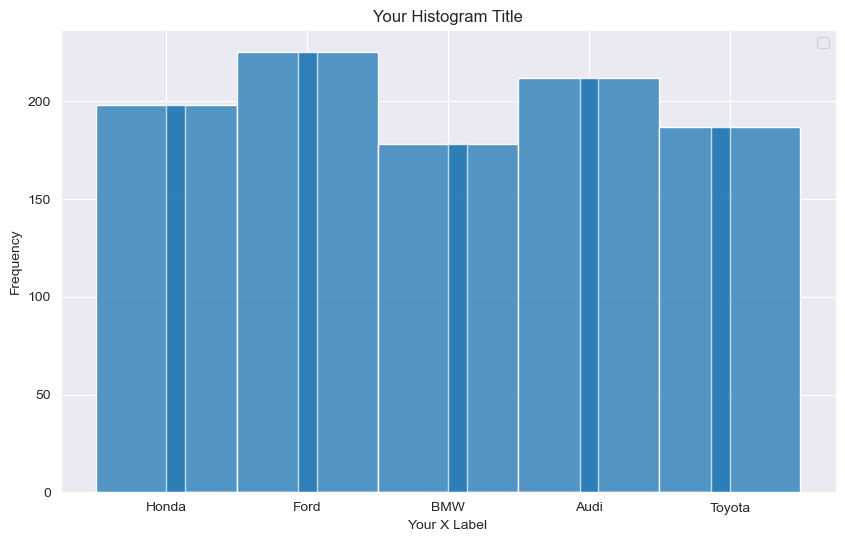

In [11]:
data_dict = df.to_dict(as_series=False)

x_values = df.select('Make').to_series().to_list()
y_values = df.select('Model').to_series().to_list()

plt.figure(figsize=(10, 6))

plot_data = {'x': x_values, 'y': y_values}
sns.histplot(data=plot_data, x='x')

plt.legend()
plt.hist(x_values, bins=30, alpha=0.7)
plt.xlabel('Your X Label')
plt.ylabel('Frequency')
plt.title('Your Histogram Title')
plt.show()
